# Assignment 6

### Exercise 09
Consider the USArrests data. We will now perform hierarchical clustering on the states.

(a) Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.

The dist() function is used to compute the 50 × 50 inter-observation Euclidean distance matrix.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
arrests = pd.read_csv("https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/USArrests.csv")
arrests.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
arrests = arrests.rename(columns={arrests.columns[0]: "State"})
arrests = arrests.set_index('State')
arrests.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [32.5, 32.5, 62.5, 62.5],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [130.0, 130.0, 150.0, 150.0],
  [115.0, 115.0, 140.0, 140.0],
  [92.5, 92.5, 127.5, 127.5],
  [47.5, 47.5, 110.0, 110.0],
  [10.0, 10.0, 78.75, 78.75],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [172.5, 172.5, 202.5, 202.5],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [243.75, 243.75, 282.5, 282.5],
  [225.0, 225.0, 263.125, 263.125],
  [187.5, 187.5, 244.0625, 244.0625],
  [305.0, 305.0, 315.0, 315.0],
  [325.0, 325.0, 335.0, 335.0],
  [310.0, 310.0, 330.0, 330.0],
  [355.0, 355.0, 365.0

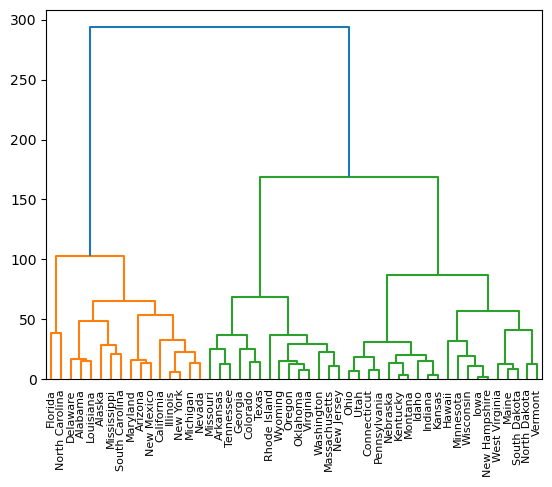

In [5]:
distance_matrix = pdist(arrests, metric = 'euclidean')
linkage_matrix = linkage(distance_matrix, method = 'complete')
dendrogram(linkage_matrix, labels = arrests.index)

(b) Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?

In [6]:
states = []
clusterss = []
clusters = fcluster(linkage_matrix, t=3, criterion='maxclust')
for state, cluster in zip(arrests.index, clusters):
    states.append(state)
    clusterss.append(cluster)
dic = {"state" : states, "cluster_og" : clusters}
df = pd.DataFrame(dic)
df

,state,cluster_og
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,2
6,Connecticut,3
7,Delaware,1
8,Florida,1
9,Georgia,2


(c) Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.



{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [52.5, 52.5, 82.5, 82.5],
  [20.0, 20.0, 67.5, 67.5],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [113.75, 113.75, 152.5, 152.5],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [275.0, 275.0, 285.0, 285.0],
  [252.5, 252.5, 280.0, 280.0],
  [295.0, 295.0, 305.0, 305.0],
  [266.25, 266.25, 300.0, 300.0],
  [222.5, 222.5, 283.125, 283.125],
  [183.75, 183.75, 252.8125, 252.8125],
  [133.125, 133.125, 218.28125, 218.28125],
  [43.75, 43.75, 175.703125, 175.703125],
  [325.0, 325.0, 335.0, 335.0]

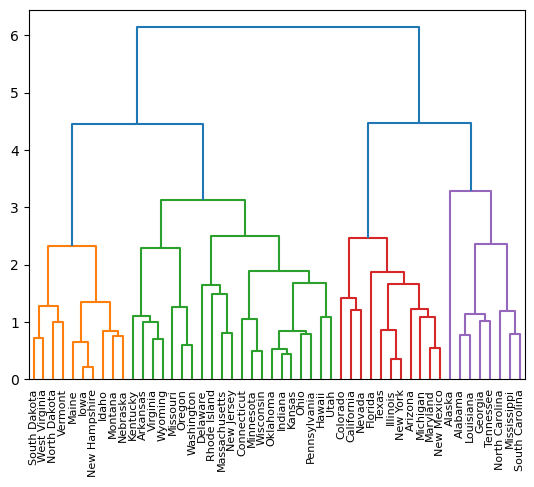

In [7]:
scaler = StandardScaler()
arrests_scaled = scaler.fit_transform(arrests)

distance_matrix = pdist(arrests_scaled, metric = 'euclidean')
linkage_matrix = linkage(distance_matrix, method = 'complete')

dendrogram(linkage_matrix, labels=arrests.index)

(d) What effect does scaling the variables have on the hierarchical clustering obtained? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed? Provide a justification for your answer.

In [8]:
clust = []
clusters = fcluster(linkage_matrix, t=3, criterion='maxclust')
for state, cluster in zip(arrests.index, clusters):
    clust.append(cluster)

df['cluster_mod'] = clust
df

,state,cluster_og,cluster_mod
0,Alabama,1,3
1,Alaska,1,3
2,Arizona,1,2
3,Arkansas,2,1
4,California,1,2
5,Colorado,2,2
6,Connecticut,3,1
7,Delaware,1,1
8,Florida,1,2
9,Georgia,2,3


Scaling the variables affects the max height of the dendogram obtained from hierarchical clustering. From a cursory glance, it doesn’t affect the bushiness of the tree obtained. However, it does affect the clusters obtained from cutting the dendogram into 3 clusters. In my opinion, for this data set the data should be standardized because the data measured has different units (UrbanPop compared to other three columns).

### Exercise 10
In this problem, you will generate simulated data, and then perform PCA and K-means clustering on the data.

(a) Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables. Hint: There are a number of functions in R that you can use to generate data. One example is the rnorm() function; runif() is another option. Be sure to add a mean shift to the observations in each class so that there are three distinct classes.

In [9]:
np.random.seed(123)
class1 = np.random.normal(loc=0, scale = 1, size = (20,50))
class2 = np.random.normal(loc=2, scale = 1, size = (20,50))
class3 = np.random.normal(loc=3, scale = 1, size = (20,50))

In [10]:
data = np.concatenate((class1, class2, class3))
labels = np.concatenate((np.repeat(1,20), np.repeat(2,20), np.repeat(3,20)))
df = pd.DataFrame(data, columns=['var' + str(i) for i in range(1,51)])
df['class'] = labels
df.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var42,var43,var44,var45,var46,var47,var48,var49,var50,class
0,-1.085631,0.997345,0.282978,-1.506295,-0.578600,1.651437,-2.426679,-0.428913,1.265936,-0.866740,...,-1.727669,-0.390900,0.573806,0.338589,-0.011830,2.392365,0.412912,0.978736,2.238143,1
1,-1.294085,-1.038788,1.743712,-0.798063,0.029683,1.069316,0.890706,1.754886,1.495644,1.069393,...,-1.267352,0.181035,1.177862,-0.335011,1.031114,-1.084568,-1.363472,0.379401,-0.379176,1
2,0.642055,-1.977888,0.712265,2.598304,-0.024626,0.034142,0.179549,-1.861976,0.426147,-1.605410,...,0.130215,1.267299,0.332765,0.556549,-0.212080,0.456271,1.544544,-0.239669,0.143308,1
3,0.253816,0.283725,-1.411889,-1.876869,-1.019655,0.167942,0.553856,-0.530675,1.377257,-0.143176,...,-0.029968,0.199582,-0.126118,0.197019,-3.231055,-0.269293,-0.110851,-0.341262,-0.217946,1
4,0.703310,-0.598105,2.200702,0.688297,-0.006307,-0.206662,-0.086522,-0.915307,-0.095203,0.278684,...,0.279663,0.249970,-0.974308,0.435876,-0.318957,0.630488,-2.152493,-1.465116,0.363446,1


(b) Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the first two principal component score vectors.

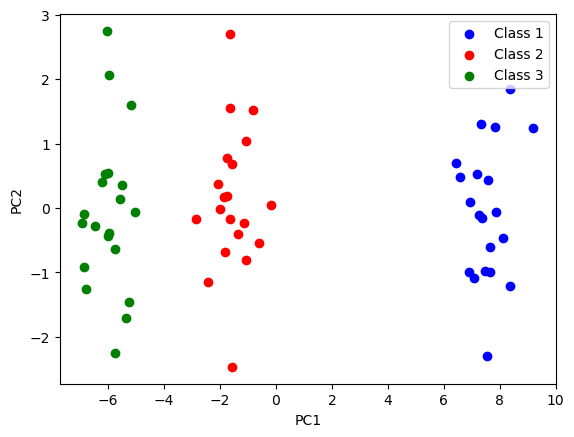

In [11]:
# Center and scale the data
scaler = StandardScaler()
X = scaler.fit_transform(df.iloc[:, :-1])

# Perform PCA
pca = PCA(n_components=2)
scores = pca.fit_transform(X)

# Plot the first two principal component score vectors
colors = ['blue', 'red', 'green']
for i in range(1, 4):
    plt.scatter(scores[df['class']==i, 0], scores[df['class']==i, 1], color=colors[i-1], label='Class '+str(i))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

(c) Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels? Hint: You can use the table() function in R to compare the true class labels to the class labels obtained by clustering. Be careful how you interpret the results: K-means clustering will arbitrarily number the clusters, so you cannot simply check whether the true class labels and clustering labels are the same.

In [12]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=123)
kmeans.fit(df.iloc[:, :-1])

# Compare the K-means clusters to the true class labels
crosstab = pd.crosstab(df['class'], kmeans.labels_)
print(crosstab)





col_0   0   1   2
class            
1       0  20   0
2       0   0  20
3      20   0   0


(d) Perform K-means clustering with K = 2. Describe your results.

In [13]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=123)
kmeans.fit(df.iloc[:, :-1])

# Compare the K-means clusters to the true class labels
crosstab = pd.crosstab(df['class'], kmeans.labels_)
print(crosstab)


col_0   0   1
class        
1       0  20
2      20   0
3      20   0


All of one previous class absorbed into a single class.

(e) Now perform K-means clustering with K = 4, and describe your results.

In [14]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=123)
kmeans.fit(df.iloc[:, :-1])

# Compare the K-means clusters to the true class labels
crosstab = pd.crosstab(df['class'], kmeans.labels_)
print(crosstab)


col_0   0  1   2   3
class               
1       0  9   0  11
2       0  0  20   0
3      20  0   0   0


All of one previous cluster split into two clusters.

(f) Now perform K-means clustering with K = 3 on the first two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the 60 × 2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.

In [17]:
kmeans_pca = KMeans(n_clusters = 3, random_state = 123)
kmeans_pca.fit(scores)
cluster_pca = kmeans_pca.labels_
table_pca = pd.crosstab(df['class'], cluster_pca)
print("\nK-means clustering on first two principal component score vectors:\n", table_pca)


K-means clustering on first two principal component score vectors:
 col_0   0   1   2
class            
1       0  20   0
2       0   0  20
3      20   0   0
